## Setting up:

In [224]:
import numpy as np
from numpy.polynomial.polynomial import Polynomial

import matplotlib.pyplot as plt

## Anderson-Darling Data Generation:

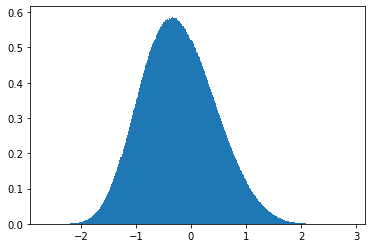

In [225]:
N = 10000000    # Total number of samples
n = 50        # Datapoints per sample

NumBins = 300 # Number of bins in histogram

# ===================================

R = np.sort(np.random.rand(n,N), axis=0)

A2 = -n - np.mean(np.arange(1,2*n,2).reshape(-1,1) * np.log(R*(1.0-np.flip(R, axis=0))), axis=0)
logAD = np.log(A2)

plt.hist(logAD, bins=NumBins, density=True)
plt.show()


## Fitting PDF:

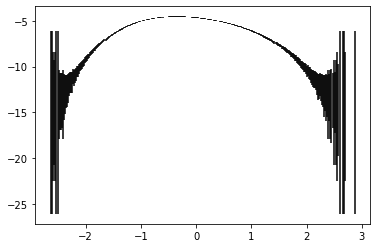

In [226]:
deg = 4       # Polynomial Degree

# ===================================

counts, edges = np.histogram(logAD, bins=NumBins)
cprob = counts/N
x = (edges[:-1] + edges[1:])/2

Nonzeros = np.where(cprob != 0.0)
cprob = cprob[Nonzeros]
x     = x[Nonzeros]

y  = np.log(cprob)        # Value
wy = (N*cprob)/ (1-cprob) # Weights
dy = 1/np.sqrt(wy)        # Standard Deviation

# plt.plot(x,y,'.k')
plt.errorbar(x,y,10*dy, c='k', fmt='none')
plt.show()

poly([-4.72725274 -2.22442511 -6.01114371  0.83633392 -6.35931921])


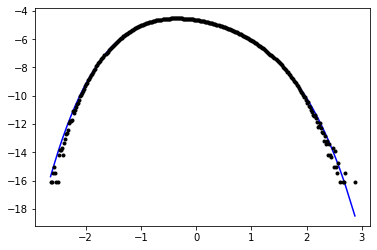

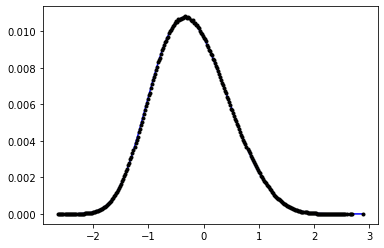

In [227]:
poly = Polynomial.fit(x, y, deg=deg, w=wy)
coefs = poly.convert().coef

print(poly)

# polystr = f'{coefs[0]:.4f} + {coefs[1]:.4f}x + ' + ' + '.join([f'{c:.4f}x^{idx+2}' for idx, c in enumerate(coefs[2:])])
# print(polystr)

yf = poly(x)

plt.figure()
plt.plot(x,yf,'-b')
plt.plot(x,y,'.k')
plt.show()

plt.figure()
plt.plot(x,np.exp(yf),'-b')
plt.plot(x,cprob,'.k')
plt.show()